## mqttPlotQakEvents.ipynb

connected to broker  mqtt.eclipseprojects.io
subscribing to unibo/sonar/events
collecting values; please wait ...
RECEIVED  msg(sonardata,event,sonar,none,distance(9.457663297653198),5946)
RECEIVED  msg(sonardata,event,sonar,none,distance(9.506772756576538),5947)
RECEIVED  msg(sonardata,event,sonar,none,distance(9.498587846755981),5948)
RECEIVED  msg(sonardata,event,sonar,none,distance(9.482218027114868),5949)
RECEIVED  msg(sonardata,event,sonar,none,distance(9.490402936935425),5950)
RECEIVED  msg(sonardata,event,sonar,none,distance(9.510865211486816),5951)
RECEIVED  msg(sonardata,event,sonar,none,distance(9.449478387832642),5952)
RECEIVED  msg(sonardata,event,sonar,none,distance(9.47812557220459),5953)
RECEIVED  msg(sonardata,event,sonar,none,distance(9.555882215499878),5954)
RECEIVED  msg(sonardata,event,sonar,none,distance(9.45357084274292),5955)
RECEIVED  msg(sonardata,event,sonar,none,distance(9.412646293640137),5956)
RECEIVED  msg(sonardata,event,sonar,none,distance(9.47403311729

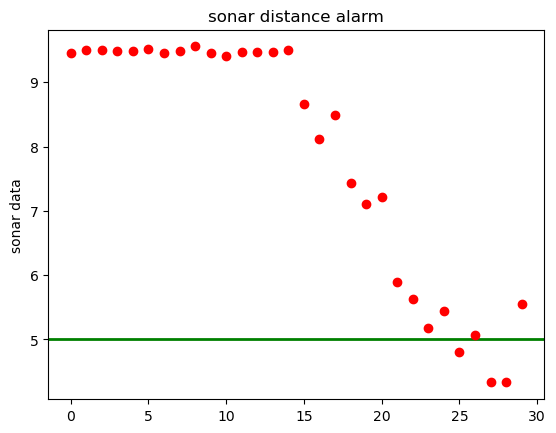

bye


In [15]:
import time
import paho.mqtt.client as paho
import matplotlib.pyplot as plt

brokerAddr="mqtt.eclipseprojects.io"  #"mqtt.eclipseprojects.io"  #"broker.hivemq.com" 
duration = 20
x        = []
d        = []
n        = 0
goon     = True
msgnum   = 0 

##############################################################
###  msg(sonarRobot,event,sonar,none,sonar(V),N)
##############################################################
def diagram() :
    global d
    ##plt.ylabel('sonar data')
    fig, ax = plt.subplots()
    ax.set_title('sonar distance alarm')
    ax.set_ylabel('sonar data')
    ax.axhline(5, color ='green', lw = 2) 
    ax.plot(list(d), 'ro') #, color='red'
    plt.show()
    
def on_message(client, userdata, message) :   #define callback
    global msgnum,  x,y,z, goon
    if not goon :
        return
    evMsg   = str( message.payload.decode("utf-8")  )
    print("RECEIVED ", evMsg)
    msgitems = evMsg.split(",")
    if msgnum < 30  :
        msgnum = msgnum + 1
        vd = float( msgitems[4].split('(')[1].split(')')[0] )
        ## if msgnum % 10 == 0  :
        ##    print("evMsg=", evMsg, vd   )  
        d.append( vd )
    else  :
        #print("evMsg plot=", evMsg, "msgnum=",  msgitems[4] )
        diagram()
        goon = False
        client.disconnect()
    
client= paho.Client("receiver")      
client.on_message=on_message            # Bind function to callback

client.connect(brokerAddr)              #connect
print("connected to broker ", brokerAddr)
print("subscribing to unibo/sonar/events")
client.subscribe("unibo/sonar/events")      #subscribe

print("collecting values; please wait ..." )
client.loop_start()             #start loop to process received messages
time.sleep(duration)
client.disconnect()             #disconnect
print("bye")
client.loop_stop()              #stop loop    